In [1]:
!python --version

Python 3.10.11


참고) 구글 코랩에서 바른 사용하기 : https://bareun.ai/docs

In [2]:
# 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# 라이브러리
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import sklearn as sk
import tensorflow as tf
from tensorflow import keras

In [4]:
# 데이터 불러오기
dataset_path = '/content/drive/MyDrive/value up/dataset/'
data = pd.read_csv(dataset_path + 'BukGu.csv')

data.head()

,content,dept
0,매천동 청구 장미아파트 삼우 그린 입구 불합리 위치 매천동 청구 장미아파트 삼우 그...,도시국 건설과
1,처리 중 언제까지 어린이보호구역 불법주차 불법적 재 신고한 지가 언제인데 아직 처리...,도시국 도시행정과
2,도로 개설 본인은 대구시 북구 태전동 번지 토지 소유자입니다 현재 상기 토지에서 농...,도시국 건설과
3,북구청장 감사실은 뭐 하는 곳입니까 묻습니다 불법에 대한 최고의 북구 전문가 북구청...,감사실
4,대구시장 북구청장 감사실은 뭐 하는 부서입니까 감사실 폐쇄하셔요 미관지구 대구시장 ...,감사실


In [5]:
# x, y 분리
x = data.loc[:, 'content'].values
y = data.loc[:, 'dept'].values

x.shape, y.shape

((6836,), (6836,))

In [6]:
# x_train, x_valid, y_train, y_valid 분리
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=1, stratify=y)

x_train.shape, x_valid.shape, y_train.shape, y_valid.shape

((5468,), (1368,), (5468,), (1368,))

In [7]:
# 바른 다운로드 (리눅스 설치본)
!curl -LJks -H "uname:$(uname -a)" https://bareun.ai/api/get -o bareun-linux.deb
!ls

bareun-linux.deb  drive  sample_data


In [8]:
# 바른 설치
!uname -a
!dpkg -i bareun-linux.deb

Linux ecd76b1c52b0 5.10.147+ #1 SMP Sat Dec 10 16:00:40 UTC 2022 x86_64 x86_64 x86_64 GNU/Linux
Selecting previously unselected package bareun.
(Reading database ... 122518 files and directories currently installed.)
Preparing to unpack bareun-linux.deb ...
Unpacking bareun (2.0.3) ...
Setting up bareun (2.0.3) ...
System has not been booted with systemd as init system (PID 1). Can't operate.
Failed to connect to bus: Host is down
System has not been booted with systemd as init system (PID 1). Can't operate.
Failed to connect to bus: Host is down
Created symlink /etc/systemd/system/multi-user.target.wants/bareun.service → /etc/systemd/system/bareun.service.


In [9]:
# GPU를 이용하기 위한 tensorflow 설치
!curl -O https://storage.googleapis.com/tensorflow/libtensorflow/libtensorflow-gpu-linux-x86_64-2.9.1.tar.gz
!tar -C /opt/bareun -xzf libtensorflow-gpu-linux-x86_64-2.9.1.tar.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  392M  100  392M    0     0  17.3M      0  0:00:22  0:00:22 --:--:-- 19.1M


In [10]:
# 환경 설정하기
%env BAREUN_ROOT="/opt/bareun"
%env LD_LIBRARY_PATH="/opt/bareun/lib"
!BAREUN_ROOT="/opt/bareun" LD_LIBRARY_PATH="/opt/bareun/lib" nohup /opt/bareun/bin/bareun&

env: BAREUN_ROOT="/opt/bareun"
env: LD_LIBRARY_PATH="/opt/bareun/lib"
nohup: appending output to 'nohup.out'


In [11]:
# 바른 서버가 실행된 정보 표시
!ps -ef | grep bareun

root        2049       1  0 14:28 ?        00:00:00 /opt/bareun/bin/bareun
root        2059    1040  0 14:28 ?        00:00:00 /bin/bash -c ps -ef | grep bareun
root        2061    2059  0 14:28 ?        00:00:00 grep bareun


In [20]:
# API키 등록 ('200 OK' 문구 확인)
!BAREUN_ROOT="/opt/bareun" LD_LIBRARY_PATH="/opt/bareun/lib" /opt/bareun/bin/bareun -reg koba-RBKJYUY-YKLU76Q-UXI6RFY-JXP6MRA

Use config file: /opt/bareun/config/bareun.json

------
200 OK
sucessfully registered koba-RBKJYUY-YKLU76Q-UXI6RFY-JXP6MRA


In [13]:
# PIP 패키지 설치
!pip install -U bareunpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
# 바른 Python 라이브러리 사용
import sys
import bareunpy as brn
import google.protobuf.text_format as tf
API_KEY = "koba-RBKJYUY-YKLU76Q-UXI6RFY-JXP6MRA"

# 바른 형태소 분석기 선언
t = brn.Tagger(API_KEY, "localhost", 5656)

In [22]:
# 텍스트 입력 -> 형태소 분석 결과를 리스트로 반환
def bareun_transform(text):
    # 500자 단위로 슬라이싱
    ready_list = []
    while (len(text) > 500):
        temp_str = text[:500]
        last_space = temp_str.rfind(' ') # 앞에서 가장 가까운 공백 ' ' 위치를 찾는다
        temp_str = text[0:last_space]
        ready_list.append(temp_str) # 문자열을 약 500자 단위로 나누어 리스트에 추가한다.

        text = text[last_space:] # 슬라이싱 한 문자는 text에서 제거
    ready_list.append(text) # 500자 이하로 남은 문자열을 마지막에 추가한다.
    
    result_list = []
    for ready in ready_list:
        result = t.tags([ready]).morphs()
        result_list.append(result)

    return sum(result_list, [])

In [27]:
%%time
print("변경 전 :", x_train[0]) # 변경 전 예시 하나 출력

x_train_tk = []
x_valid_tk = []
for i, sentence in enumerate(x_train):
    x_train_tk.append(bareun_transform(sentence))
for i, sentence in enumerate(x_valid):
    x_valid_tk.append(bareun_transform(sentence))

print("변경 후 :", x_train_tk[0]) # 변경 후 예시 하나 출력

변경 전 : 옥산초등학교 주변 보행로 북구 침산동 옥산초등학교 진입로 쪽으로 보행로라고 표시가 되어 있는데 페인트로 표시만 되어 있고 안전바는 설치되어 있지 않음 아침에 아이들 학교 가는 길을 보면 보행로는 완전히 동네 주민들의 주차장이 되어 버리고 양쪽으로 주차되어 있음 비록 일반 통행이지만 차 한 대 겨우 지나다닐 정도밖에 되지 않아 등교하는 아이들의 안전에 크게 문제가 된다고 봅니다 물론 주위가 주택가라서 아이들만 다닐 수 있는 보행로를 만드는 게 무리라고 보지만 아이들 안전을 위해서는 어떤 대책이 필요하다고 생각됩니다 불법주차를 강력하게 단속하던지 아니면 진입로 오른쪽 주택이 많이 없음에 아이들만의 보행로를 만들어야 하지 않나요 아이를 학교에 보내는 학부모 입장에서 너무 불안해서 글을 올리며 성의 있는 답변을 바랍니다
변경 후 : ['옥산', '초등학교', '주변', '보행로', '북구', '침산동', '옥산', '초등학교', '진입로', '쪽', '으로', '보행로', '이', '라고', '표시', '가', '되', '어', '있', '는데', '페인트', '로', '표시', '만', '되', '어', '있', '고', '안전바', '는', '설치되', '어', '있', '지', '않', '음', '아침', '에', '아이', '들', '학교', '가', '는', '길', '을', '보', '면', '보행로', '는', '완전히', '동네', '주민', '들', '의', '주차장', '이', '되', '어', '버리', '고', '양쪽', '으로', '주차되', '어', '있', '음', '비록', '일반', '통행', '이', '지만', '차', '한', '대', '겨우', '지나다니', 'ㄹ', '정도', '밖에', '되', '지', '않', '아', '등교하', '는', '아이', '들', '의', '안전', '에', '크', '게', '문제', '가', '되', 'ㄴ다고', '보', 'ㅂ니다', '물론', '주위', '가', '주택가', '이'

In [28]:
#gensim은 자연어 처리를 위한 오픈소스 라이브러리입니다. 토픽 모델링, 워드 임베딩 등 다양한 자연어 처리 기능을 제공
!pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [29]:
import gensim
gensim.__version__

'4.3.1'

In [30]:
from gensim.models import Word2Vec

# Word2Vec 모델 생성
wv_model = Word2Vec(x_train_tk, vector_size= 1000, window= 5, min_count= 5, workers = 4, sg = 1)

In [31]:
# Word2Vec 모델로부터 하나의 문장을 벡터화 시키는 함수
def get_sent_embedding(model, embedding_size, tokenized_words):
    # 임베딩 벡터를 0으로 초기화
    feature_vec = np.zeros((embedding_size,), dtype='float32')
    # 단어 개수 초기화
    n_words = 0
    # 모델 단어 집합 생성
    index2word_set = set(model.wv.index_to_key)
    # 문장의 단어들을 하나씩 반복
    for word in tokenized_words:
        # 모델 단어 집합에 해당하는 단어일 경우에만
        if word in index2word_set:
            # 단어 개수 1 증가
            n_words += 1
            # 임베딩 벡터에 해당 단어의 벡터를 더함
            feature_vec = np.add(feature_vec, model.wv[word])
    # 단어 개수가 0보다 큰 경우 벡터를 단어 개수로 나눠줌 (평균 임베딩 벡터 계산)
    if (n_words > 0):
        feature_vec = np.divide(feature_vec, n_words)
    return feature_vec

In [32]:
# 문장벡터 데이터 셋 만들기
def get_dataset(sentences, model, num_features):
    dataset = list()

    # 각 문장을 벡터화해서 리스트에 저장
    for sent in sentences:
        dataset.append(get_sent_embedding(model, num_features, sent))

    # 리스트를 numpy 배열로 변환하여 반환
    sent_embedding_vectors = np.stack(dataset)
    
    return sent_embedding_vectors

In [33]:
# 학습 데이터의 문장들을 Word2Vec 모델을 사용하여 벡터화
x_train_vecs = get_dataset(x_train_tk, wv_model, 1000)
x_valid_vecs = get_dataset(x_valid_tk, wv_model, 1000)

x_train_vecs

array([[ 0.08000941, -0.01809808,  0.01664994, ..., -0.09522936,
        -0.0166755 , -0.001891  ],
       [ 0.10926804, -0.09288839, -0.01815041, ..., -0.11063439,
        -0.00424287, -0.03309273],
       [ 0.07441667, -0.03628435,  0.02440092, ..., -0.12808852,
        -0.00476435, -0.01505849],
       ...,
       [ 0.15647355, -0.06129537,  0.03370745, ..., -0.10488403,
        -0.03016373, -0.0239739 ],
       [ 0.0634504 , -0.02110584,  0.0045668 , ..., -0.14691365,
        -0.03648721, -0.01058008],
       [ 0.06616315, -0.03281383, -0.01387033, ..., -0.1316205 ,
        -0.02651796, -0.01696303]], dtype=float32)

In [34]:
y_train

array(['도시국 교통과', '감사실', '감사실', ..., '감사실', '도시국 교통과', '도시국 교통과'],
      dtype=object)

In [35]:
train_data_w2v = pd.DataFrame(x_train_vecs)
valid_data_w2v = pd.DataFrame(x_valid_vecs)

train_data_w2v = train_data_w2v.assign(dept=y_train)
valid_data_w2v = valid_data_w2v.assign(dept=y_valid)

train_data_w2v.head()

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,dept
0,0.080009,-0.018098,0.016650,0.095072,-0.019587,-0.034895,0.029254,0.042591,0.005273,0.018359,...,0.005326,0.060821,-0.046086,0.036869,0.054317,0.006726,-0.095229,-0.016675,-0.001891,도시국 교통과
1,0.109268,-0.092888,-0.018150,0.094119,-0.047911,-0.001778,-0.010174,0.039290,-0.016769,0.028576,...,0.004949,0.055977,-0.138829,0.068596,0.013294,0.039920,-0.110634,-0.004243,-0.033093,감사실
2,0.074417,-0.036284,0.024401,0.082374,-0.039632,-0.038068,0.006345,0.034661,0.000343,0.018796,...,-0.027559,0.053752,-0.104938,0.073828,0.041869,-0.005322,-0.128089,-0.004764,-0.015058,감사실
3,0.116239,-0.052859,0.019975,0.090755,-0.034070,-0.012240,0.004934,0.006258,-0.034496,0.072566,...,-0.035157,0.078792,-0.118328,0.135947,-0.013047,-0.008267,-0.118021,-0.030711,-0.025460,도시국 건축주택과
4,0.160463,-0.077774,0.028288,0.092934,-0.032900,-0.012817,-0.009148,0.037993,-0.031968,0.081773,...,-0.039492,0.049510,-0.103911,0.150526,-0.014082,-0.021165,-0.081358,-0.030585,-0.035877,감사실


In [36]:
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0


In [37]:
!pip install torch==2.0.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [41]:
# 우선 다운로드
!pip install --upgrade mxnet-cu117
!pip install autogluon

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 509.2/509.2 MB 2.0 MB/s eta 0:00:00
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.1
    Uninstalling graphviz-0.20.1:
      Successfully uninstalled graphviz-0.20.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [42]:
# mxnet 라이브러리가 GPU를 지원하는 버전인지 확인
import mxnet as mx

print(mx.context.num_gpus())

1


In [43]:
# 저희는 Tabular Data를 다루기 때문에 아래 라이브러리를 호출합니다.
import autogluon as ag
from autogluon.tabular import TabularPredictor

In [44]:
# 이렇게 한 줄만 작성하면 내부에서 알아서 학습해줍니다.
predictor = TabularPredictor(label='dept').fit(train_data_w2v)

No path specified. Models will be saved in: "AutogluonModels/ag-20230501_145156/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20230501_145156/"
AutoGluon Version:  0.7.0
Python Version:     3.10.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Dec 10 16:00:40 UTC 2022
Train Data Rows:    5468
Train Data Columns: 1000
Label Column: dept
Preprocessing data ...
AutoGluon infers your prediction problem is: 'multiclass' (because dtype of label-column == object).
	9 unique label values:  ['도시국 교통과', '감사실', '도시국 건축주택과', '도시국 도시행정과', '복지환경국 환경관리과', '도시국 건설과', '문화녹지국 공원녹지과', '읍/면/동사무소', '복지환경국 자원순환과']
	If 'multiclass' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Train Data Class Count: 9
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...

In [45]:
# 각각의 모델의 훈련 성능을 평가할 수 있음
predictor.leaderboard(train_data_w2v, silent=True)

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LightGBMXT,0.978054,0.786106,1.041637,0.104558,182.695932,1.041637,0.104558,182.695932,1,True,4
1,LightGBM,0.977323,0.778793,0.435189,0.038466,244.901922,0.435189,0.038466,244.901922,1,True,5
2,XGBoost,0.976591,0.771481,0.693646,0.045217,236.628259,0.693646,0.045217,236.628259,1,True,11
3,LightGBMLarge,0.974762,0.753199,1.267006,0.127865,611.216419,1.267006,0.127865,611.216419,1,True,13
4,ExtraTreesGini,0.974396,0.749543,0.338175,0.126843,2.382471,0.338175,0.126843,2.382471,1,True,9
5,RandomForestGini,0.973665,0.742230,0.319145,0.122442,16.793776,0.319145,0.122442,16.793776,1,True,6
6,RandomForestEntr,0.973482,0.740402,0.297337,0.120361,29.710121,0.297337,0.120361,29.710121,1,True,7
7,ExtraTreesEntr,0.973299,0.738574,0.335662,0.124416,2.767890,0.335662,0.124416,2.767890,1,True,10
8,KNeighborsDist,0.971836,0.723949,0.710048,0.314207,0.400587,0.710048,0.314207,0.400587,1,True,2
9,WeightedEnsemble_L2,0.968727,0.815356,2.793531,1.132304,36.205438,0.009298,0.000848,0.936615,2,True,14


In [46]:
# 가장 성능이 좋았던 모델
predictor.leaderboard().iloc[0]

                  model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L2   0.815356       1.132304   36.205438                0.000848           0.936615            2       True         14
1        NeuralNetTorch   0.795247       0.270139   14.949226                0.270139          14.949226            1       True         12
2            LightGBMXT   0.786106       0.104558  182.695932                0.104558         182.695932            1       True          4
3       NeuralNetFastAI   0.782450       0.021775   13.252280                0.021775          13.252280            1       True          3
4              LightGBM   0.778793       0.038466  244.901922                0.038466         244.901922            1       True          5
5               XGBoost   0.771481       0.045217  236.628259                0.045217         236.628259            1       True         11
6              CatBo

model                     WeightedEnsemble_L2
score_val                            0.815356
pred_time_val                        1.132304
fit_time                            36.205438
pred_time_val_marginal               0.000848
fit_time_marginal                    0.936615
stack_level                                 2
can_infer                                True
fit_order                                  14
Name: 0, dtype: object

In [47]:
# 성능이 가장 좋았던 모델의 이름
predictor.get_model_best()

'WeightedEnsemble_L2'

In [48]:
# 학습모델 요약
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                  model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L2   0.815356       1.132304   36.205438                0.000848           0.936615            2       True         14
1        NeuralNetTorch   0.795247       0.270139   14.949226                0.270139          14.949226            1       True         12
2            LightGBMXT   0.786106       0.104558  182.695932                0.104558         182.695932            1       True          4
3       NeuralNetFastAI   0.782450       0.021775   13.252280                0.021775          13.252280            1       True          3
4              LightGBM   0.778793       0.038466  244.901922                0.038466         244.901922            1       True          5
5               XGBoost   0.771481       0.045217  236.628259                0.045217         236.

{'model_types': {'KNeighborsUnif': 'KNNModel',
  'KNeighborsDist': 'KNNModel',
  'NeuralNetFastAI': 'NNFastAiTabularModel',
  'LightGBMXT': 'LGBModel',
  'LightGBM': 'LGBModel',
  'RandomForestGini': 'RFModel',
  'RandomForestEntr': 'RFModel',
  'CatBoost': 'CatBoostModel',
  'ExtraTreesGini': 'XTModel',
  'ExtraTreesEntr': 'XTModel',
  'XGBoost': 'XGBoostModel',
  'NeuralNetTorch': 'TabularNeuralNetTorchModel',
  'LightGBMLarge': 'LGBModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif': 0.7221206581352834,
  'KNeighborsDist': 0.7239488117001828,
  'NeuralNetFastAI': 0.7824497257769653,
  'LightGBMXT': 0.7861060329067642,
  'LightGBM': 0.7787934186471663,
  'RandomForestGini': 0.7422303473491774,
  'RandomForestEntr': 0.7404021937842779,
  'CatBoost': 0.7678244972577697,
  'ExtraTreesGini': 0.7495429616087751,
  'ExtraTreesEntr': 0.7385740402193784,
  'XGBoost': 0.7714808043875686,
  'NeuralNetTorch': 0.7952468007312614,
  'LightGBMLarge': 

In [49]:
# 우리가 가진 valid 데이터로 평가
predictor.evaluate(valid_data_w2v)

Evaluation: accuracy on test data: 0.7719298245614035
Evaluations on test data:
{
    "accuracy": 0.7719298245614035,
    "balanced_accuracy": 0.64407391608956,
    "mcc": 0.7307659540264726
}


{'accuracy': 0.7719298245614035,
 'balanced_accuracy': 0.64407391608956,
 'mcc': 0.7307659540264726}

In [50]:
# 예측하기
y_pred = predictor.predict(valid_data_w2v)

y_valid: ['도시국 교통과' '감사실' '감사실' '도시국 건축주택과' '복지환경국 환경관리과' '도시국 건축주택과' '감사실'
 '도시국 건설과' '도시국 교통과' '도시국 건설과']
y_pred: 0      도시국 교통과
1          감사실
2          감사실
3    도시국 건축주택과
4    도시국 건축주택과
5    도시국 건축주택과
6          감사실
7      도시국 교통과
8      도시국 교통과
9      도시국 건설과
Name: dept, dtype: object
accuracy: 0.7719298245614035
f1 score: 0.6668902500569645


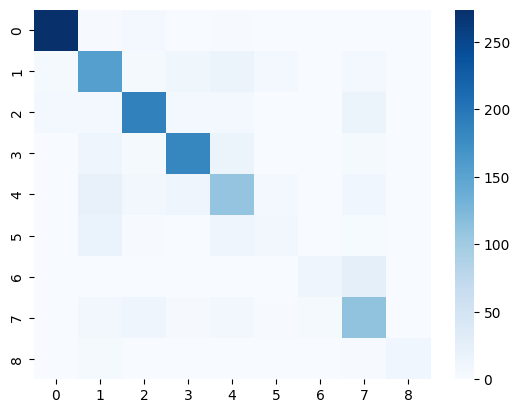

              precision    recall  f1-score   support

         감사실       0.95      0.96      0.96       285
     도시국 건설과       0.68      0.76      0.72       206
   도시국 건축주택과       0.83      0.82      0.82       231
     도시국 교통과       0.84      0.82      0.83       224
   도시국 도시행정과       0.64      0.65      0.65       169
 문화녹지국 공원녹지과       0.39      0.20      0.26        45
 복지환경국 자원순환과       0.71      0.32      0.44        37
 복지환경국 환경관리과       0.62      0.74      0.67       152
    읍/면/동사무소       0.83      0.53      0.65        19

    accuracy                           0.77      1368
   macro avg       0.72      0.64      0.67      1368
weighted avg       0.77      0.77      0.77      1368



In [51]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

print('y_valid:', y_valid[:10])
print('y_pred:', y_pred[:10])


print('accuracy:', accuracy_score(y_valid, y_pred))
print('f1 score:', f1_score(y_valid, y_pred, average='macro'))

sns.heatmap(confusion_matrix(y_valid, y_pred), cmap='Blues')
plt.show()

print(classification_report(y_valid, y_pred))

In [53]:
predictor.save() # 모델을 저장합니다. 그런데 저장이 안된다... 됐나...?

TabularPredictor saved. To load, use: predictor = TabularPredictor.load("AutogluonModels/ag-20230501_145156/")


In [52]:
from google.colab import files
import shutil

# 폴더 압축
shutil.make_archive('/content/AutogluonModels', 'zip', '/content/AutogluonModels')

# 압축된 파일 다운로드
files.download('/content/AutogluonModels.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>